In [1]:
import numpy as np
import pandas as pd
policies = pd.read_csv('10_variables.csv', header=None)
outcomes = pd.read_csv('10_solution.csv')

In [2]:
outcomes_df = outcomes

In [3]:
outcomes_df = outcomes_df[['hydropowerAk', 'hydropowerKp', 'environment', 'irrigation', 'floodcontrol']]
outcomes_df

,hydropowerAk,hydropowerKp,environment,irrigation,floodcontrol
0,4459.467657,886.048866,0.451960,0.138000,0.0
1,4469.125135,888.249056,0.442041,0.196994,0.0
2,4422.183625,878.146532,0.480113,0.190492,0.0
3,4469.482053,887.581210,0.412943,0.242108,0.0
4,4429.141772,875.855240,0.481247,0.428530,0.0
...,...,...,...,...,...
262,3889.659253,746.358699,0.580822,0.880408,0.0
263,4310.451558,838.420150,0.493151,0.902331,0.0
264,3259.067215,611.907294,0.673973,0.905194,0.0
265,4345.729170,852.540409,0.490128,0.771188,0.0


C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


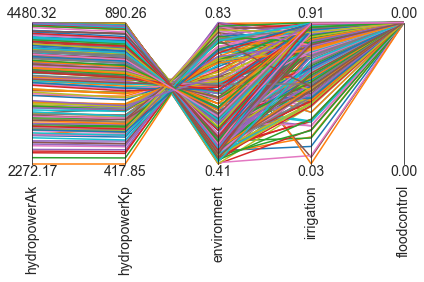

In [4]:
import seaborn
import matplotlib.pyplot as plt

from ema_workbench.analysis import parcoords

all_data = outcomes_df

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data)
axes.invert_axis('floodcontrol')
plt.show()

In [5]:
filtered_df =  outcomes_df[outcomes_df['hydropowerAk'] >= outcomes_df['hydropowerAk'].max()*0.8]
filtered_df =  filtered_df[filtered_df['hydropowerKp'] >= outcomes_df['hydropowerKp'].max()*0.75]
filtered_df = filtered_df[filtered_df['environment'] >= outcomes_df['environment'].max()*0.75]
filtered_df = filtered_df[filtered_df['irrigation'] >= outcomes_df['irrigation'].max()*0.75]

best_df = outcomes_df[outcomes_df['hydropowerAk'] == outcomes_df['hydropowerAk'].max()]
best_df = pd.concat([best_df, outcomes_df[outcomes_df['hydropowerKp'] == outcomes_df['hydropowerKp'].max()]])
# best_df = pd.concat([best_df, outcomes_df[outcomes_df['floodcontrol'] == outcomes_df['floodcontrol'].max()]])
best_df = pd.concat([best_df, outcomes_df[outcomes_df['environment'] == outcomes_df['environment'].max()]])
best_df = pd.concat([best_df, outcomes_df[outcomes_df['irrigation'] == outcomes_df['irrigation'].max()]])

In [6]:
# best_df = outcomes_df[outcomes_df['hydropowerAk'] == outcomes_df['hydropowerAk'].max()]
selected_policy_df = pd.concat([best_df.drop_duplicates(),filtered_df])

In [7]:
policy_index = np.array(selected_policy_df.index)
filtered_policies = policies.iloc[policy_index]
filtered_policies.to_csv('filteredReleasePolicies.csv', header=None, index=False)

In [8]:
len(policy_index)

9

In [12]:
selected_policy_df

,hydropowerAk,hydropowerKp,environment,irrigation,floodcontrol
6,4480.317821,890.264737,0.416438,0.081245,0.0
204,2496.875017,464.749350,0.832877,0.822179,0.0
171,2272.168369,417.853055,0.830137,0.910136,0.0
53,3604.114904,689.506167,0.641096,0.723197,0.0
76,3597.281121,686.628547,0.646575,0.774017,0.0
121,3587.701382,684.548542,0.643836,0.800390,0.0
176,3603.149498,690.210551,0.643836,0.717543,0.0
225,3596.480596,688.377240,0.646575,0.769970,0.0
253,3702.276045,705.985876,0.630137,0.873364,0.0


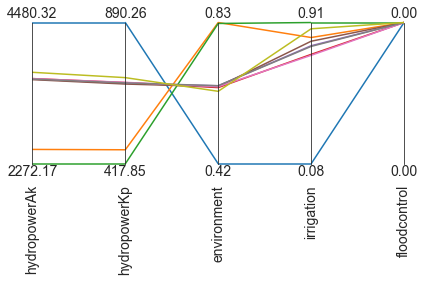

In [9]:
import seaborn
import matplotlib.pyplot as plt

from ema_workbench.analysis import parcoords

all_data = selected_policy_df

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data)
axes.invert_axis('floodcontrol')
plt.show()

In [10]:
best_hpak =  outcomes_df[outcomes_df['hydropowerAk'] == outcomes_df['hydropowerAk'].max()]
best_hpkp =  outcomes_df[outcomes_df['hydropowerKp'] == outcomes_df['hydropowerKp'].max()]
best_env = outcomes_df[outcomes_df['environment'] == outcomes_df['environment'].max()]
best_irri = outcomes_df[outcomes_df['irrigation'] == outcomes_df['irrigation'].max()]
#best_df = pd.concat([best_df, outcomes_df[outcomes_df['floodcontrol'] == outcomes_df['floodcontrol'].max()]])


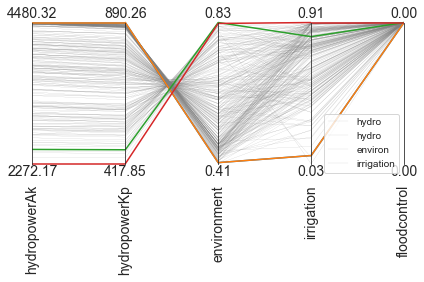

In [11]:
import seaborn
import matplotlib.pyplot as plt

from ema_workbench.analysis import parcoords

all_data = outcomes_df

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data,color='grey', linewidth=0.1, label='_')
axes.plot(best_hpak, label = 'hydro_ak')
axes.plot(best_hpkp, label = 'hydro_kp')
axes.plot(best_env, label = 'env')
axes.plot(best_irri, label = 'irri')

axes.invert_axis('floodcontrol')
plt.legend(['hydro', 'hydro', 'environ', 'irrigation'])
plt.show()